- Exercici 1

Realitza web scraping d'una pàgina de la borsa de Madrid (https://www.bolsamadrid.es) utilitzant BeautifulSoup i Selenium.

S'utilitza selenium per accedir a l'apartat d'accions de tecnologia i telecomunicacions.

In [1]:
from selenium import webdriver
from bs4 import BeautifulSoup
from selenium.webdriver.support.ui import Select
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re


driver = webdriver.Firefox()
driver.get("https://www.bolsamadrid.es")
assert "Bolsa de Madrid" in driver.title
acciones = driver.find_element_by_link_text('Acciones').click()
menu = Select(driver.find_element_by_id('SelSector'))
menu.select_by_visible_text('Tecnología y Telecomunicaciones')
consultar = driver.find_element_by_id('ctl00_Contenido_Consultar').click()

URL = driver.current_url
page = requests.get(URL)

In [2]:
soup = BeautifulSoup(page.content, "html.parser")
print(soup.prettify())

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
 <head data-analytics-id="UA-35966870-2" data-app-path="/" data-bolsa="BMadrid" data-hora-act="Thu, 30 Sep 2021 14:47:33 GMT" data-idioma="esp">
  <meta content="IE=11" http-equiv="X-UA-Compatible"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="Copyright © BME 2021" id="ctl00_copyright" name="copyright"/>
  <title>
   Bolsa de Madrid - Precios de la sesión
  </title>
  <link href="/esp/aspx/RSS/RSS.ashx?feed=Todo" id="ctl00_RSSLink1" rel="alternate" title="Bolsa de Madrid: Todos los contenidos agregados" type="application/rss+xml"/>
  <link href="/esp/aspx/RSS/RSS.ashx?feed=NotasPrensa" id="ctl00_RSSLink2" rel="alternate" title="Bolsa de Madrid: Notas de Prensa" type="application/rss+xml"/>
  <link href="/esp/aspx/RSS/RSS.ashx?feed=Regulacion" id="ctl00_RSSLink3" rel="alternate" t

Utilitzem BeautifulSoup per scrapejar les accions. Posteriorment les guardarem en un DataFrame que guardarem en un archiu csv

In [3]:
tabla = soup.find(id="ctl00_Contenido_tblAcciones")

rows = tabla.find_all('tr')
i=0
columns = []
header = []
for row in rows:
    if i==0:
        cols = row.find_all('th')
        cols=[x.text.strip() for x in cols]
        header.extend(cols)
    else:
        cols=row.find_all('td')
        cols=[x.text.strip() for x in cols]
        columns.append(cols)
    i+=1

print(header)
print(columns)

['Nombre', 'Últ.', '% Dif.', 'Máx.', 'Mín.', 'Volumen', 'Efectivo (miles €)', 'Fecha', 'Hora']
[['ACCIONA', '143,9000', '-0,42', '147,2000', '143,8000', '26.028', '3.771,58', '30/09/2021', '14:29:53'], ['ACERINOX', '11,1850', '-0,27', '11,3850', '11,1700', '400.529', '4.519,13', '30/09/2021', '14:28:40'], ['ACS', '23,5700', '-0,21', '23,9800', '23,4600', '456.325', '10.833,68', '30/09/2021', '14:30:45'], ['AENA', '148,4500', '-0,30', '149,8000', '145,9500', '72.425', '10.750,70', '30/09/2021', '14:31:02'], ['ALMIRALL', '13,6200', '0,29', '13,7700', '13,6100', '104.301', '1.428,35', '30/09/2021', '14:20:02'], ['AMADEUS', '56,7000', '-1,63', '58,2200', '56,3600', '199.582', '11.422,32', '30/09/2021', '14:31:15'], ['ARCELORMIT.', '26,2600', '1,47', '26,4150', '26,0300', '259.835', '6.817,30', '30/09/2021', '14:31:05'], ['B.SANTANDER', '3,1430', '-0,43', '3,1940', '3,1250', '12.587.980', '39.822,88', '30/09/2021', '14:31:51'], ['BA.SABADELL', '0,7186', '-1,10', '0,7434', '0,7118', '15.670.

In [4]:
driver.close()

Convertim les variables numèriques a float.

In [16]:
ibex = pd.DataFrame(data=columns, columns=header)
ibex

,Nombre,Últ.,% Dif.,Máx.,Mín.,Volumen,Efectivo (miles €),Fecha,Hora
0,ACCIONA,"143,9000","-0,42","147,2000","143,8000",26.028,"3.771,58",30/09/2021,14:29:53
1,ACERINOX,"11,1850","-0,27","11,3850","11,1700",400.529,"4.519,13",30/09/2021,14:28:40
2,ACS,"23,5700","-0,21","23,9800","23,4600",456.325,"10.833,68",30/09/2021,14:30:45
3,AENA,"148,4500","-0,30","149,8000","145,9500",72.425,"10.750,70",30/09/2021,14:31:02
4,ALMIRALL,"13,6200","0,29","13,7700","13,6100",104.301,"1.428,35",30/09/2021,14:20:02
5,AMADEUS,"56,7000","-1,63","58,2200","56,3600",199.582,"11.422,32",30/09/2021,14:31:15
6,ARCELORMIT.,"26,2600","1,47","26,4150","26,0300",259.835,"6.817,30",30/09/2021,14:31:05
7,B.SANTANDER,"3,1430","-0,43","3,1940","3,1250",12.587.980,"39.822,88",30/09/2021,14:31:51
8,BA.SABADELL,"0,7186","-1,10","0,7434","0,7118",15.670.080,"11.364,48",30/09/2021,14:31:51
9,BANKINTER,"5,0800","0,36","5,1140","5,0380",772.679,"3.919,72",30/09/2021,14:31:32


In [17]:
nums = ['Últ.','% Dif.','Máx.','Mín.','Volumen','Efectivo (miles €)']

for num in nums:
    ibex[num] = ibex[num].str.replace(r'.', '')
    ibex[num] = ibex[num].str.replace(r',', '.')
    ibex[num] = ibex[num].astype('float64')

<ipython-input-17-123093f47a20>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  ibex[num] = ibex[num].str.replace(r'.', '')


In [18]:
ibex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Nombre              35 non-null     object 
 1   Últ.                35 non-null     float64
 2   % Dif.              35 non-null     float64
 3   Máx.                35 non-null     float64
 4   Mín.                35 non-null     float64
 5   Volumen             35 non-null     float64
 6   Efectivo (miles €)  35 non-null     float64
 7   Fecha               35 non-null     object 
 8   Hora                35 non-null     object 
dtypes: float64(6), object(3)
memory usage: 2.6+ KB


In [19]:
ibex

,Nombre,Últ.,% Dif.,Máx.,Mín.,Volumen,Efectivo (miles €),Fecha,Hora
0,ACCIONA,143.9000,-0.42,147.2000,143.8000,26028.0,3771.58,30/09/2021,14:29:53
1,ACERINOX,11.1850,-0.27,11.3850,11.1700,400529.0,4519.13,30/09/2021,14:28:40
2,ACS,23.5700,-0.21,23.9800,23.4600,456325.0,10833.68,30/09/2021,14:30:45
3,AENA,148.4500,-0.30,149.8000,145.9500,72425.0,10750.70,30/09/2021,14:31:02
4,ALMIRALL,13.6200,0.29,13.7700,13.6100,104301.0,1428.35,30/09/2021,14:20:02
5,AMADEUS,56.7000,-1.63,58.2200,56.3600,199582.0,11422.32,30/09/2021,14:31:15
6,ARCELORMIT.,26.2600,1.47,26.4150,26.0300,259835.0,6817.30,30/09/2021,14:31:05
7,B.SANTANDER,3.1430,-0.43,3.1940,3.1250,12587980.0,39822.88,30/09/2021,14:31:51
8,BA.SABADELL,0.7186,-1.10,0.7434,0.7118,15670080.0,11364.48,30/09/2021,14:31:51
9,BANKINTER,5.0800,0.36,5.1140,5.0380,772679.0,3919.72,30/09/2021,14:31:32


Descripcions gràfiques per a l'informe:

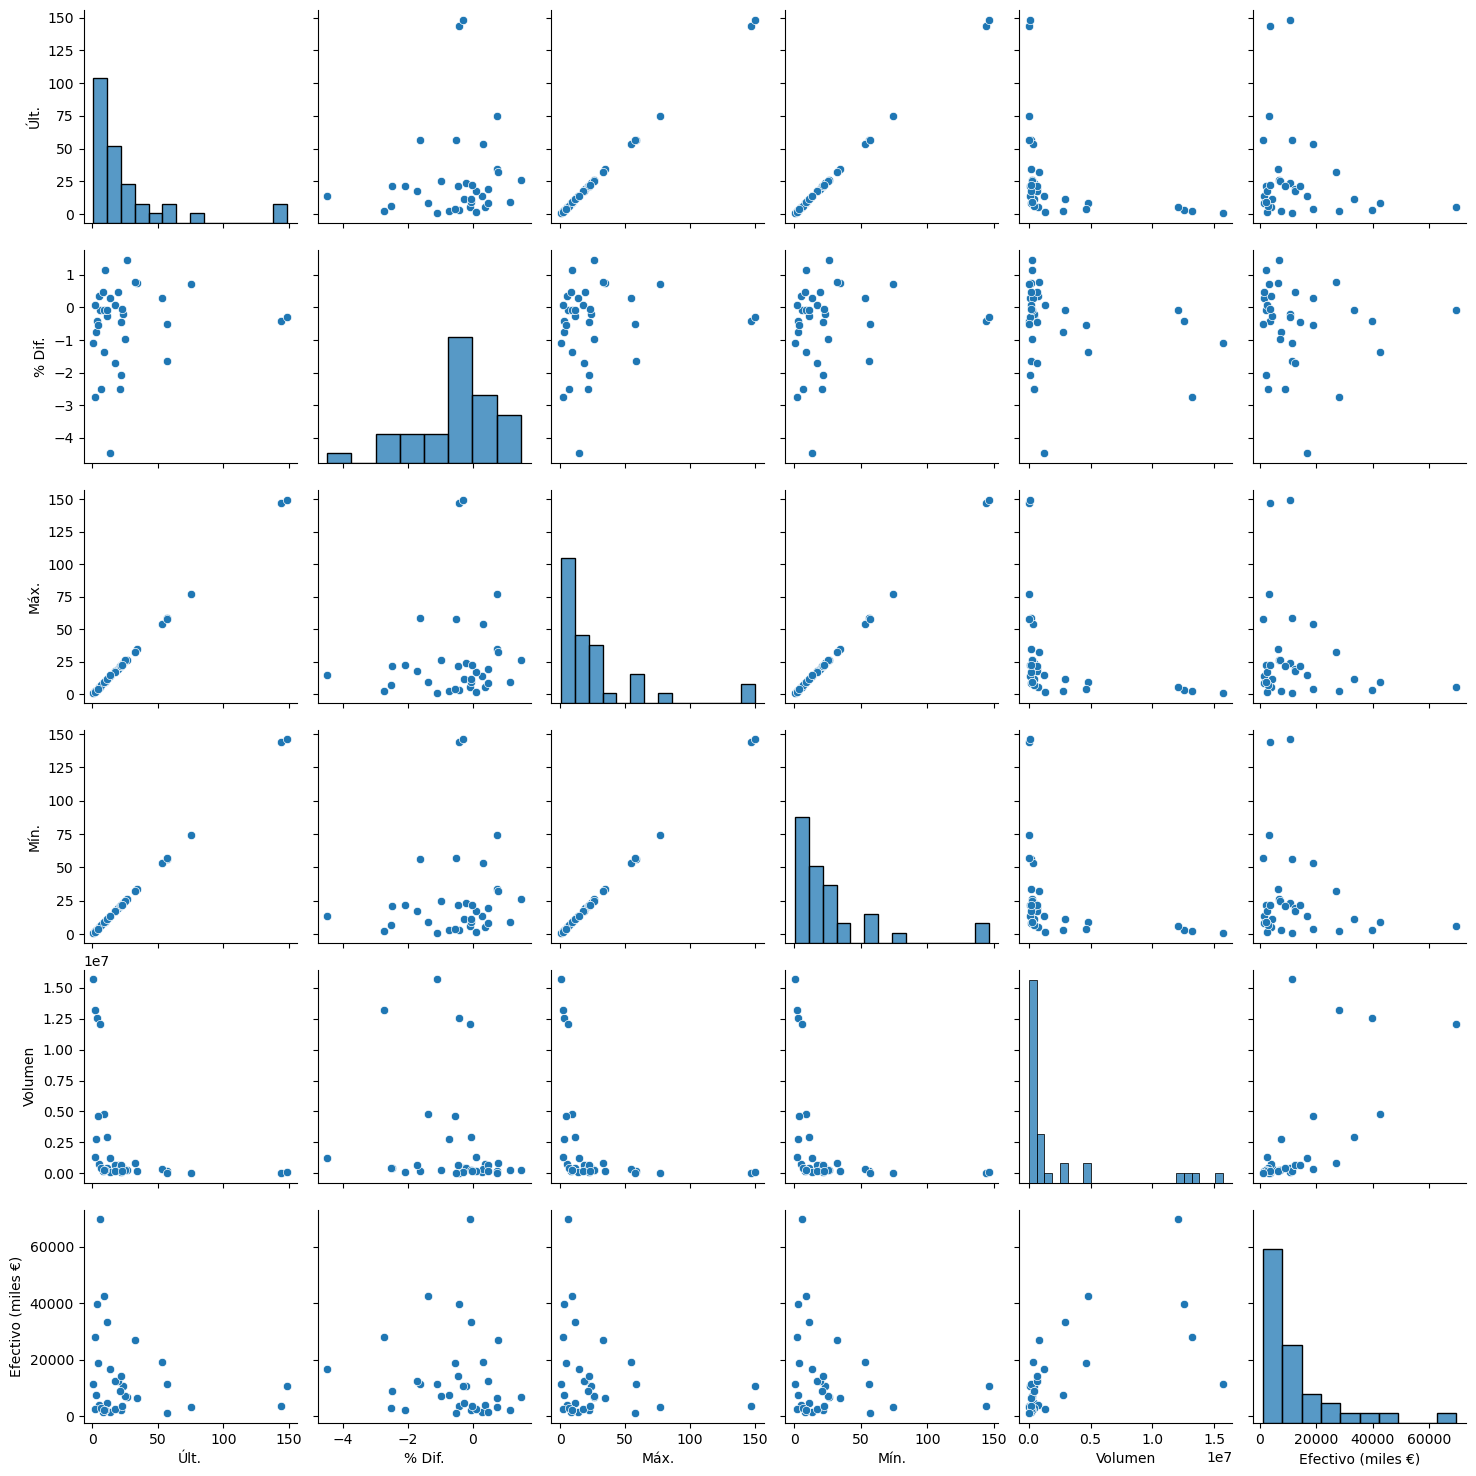

In [27]:
sns.pairplot(data=ibex)
plt.show()

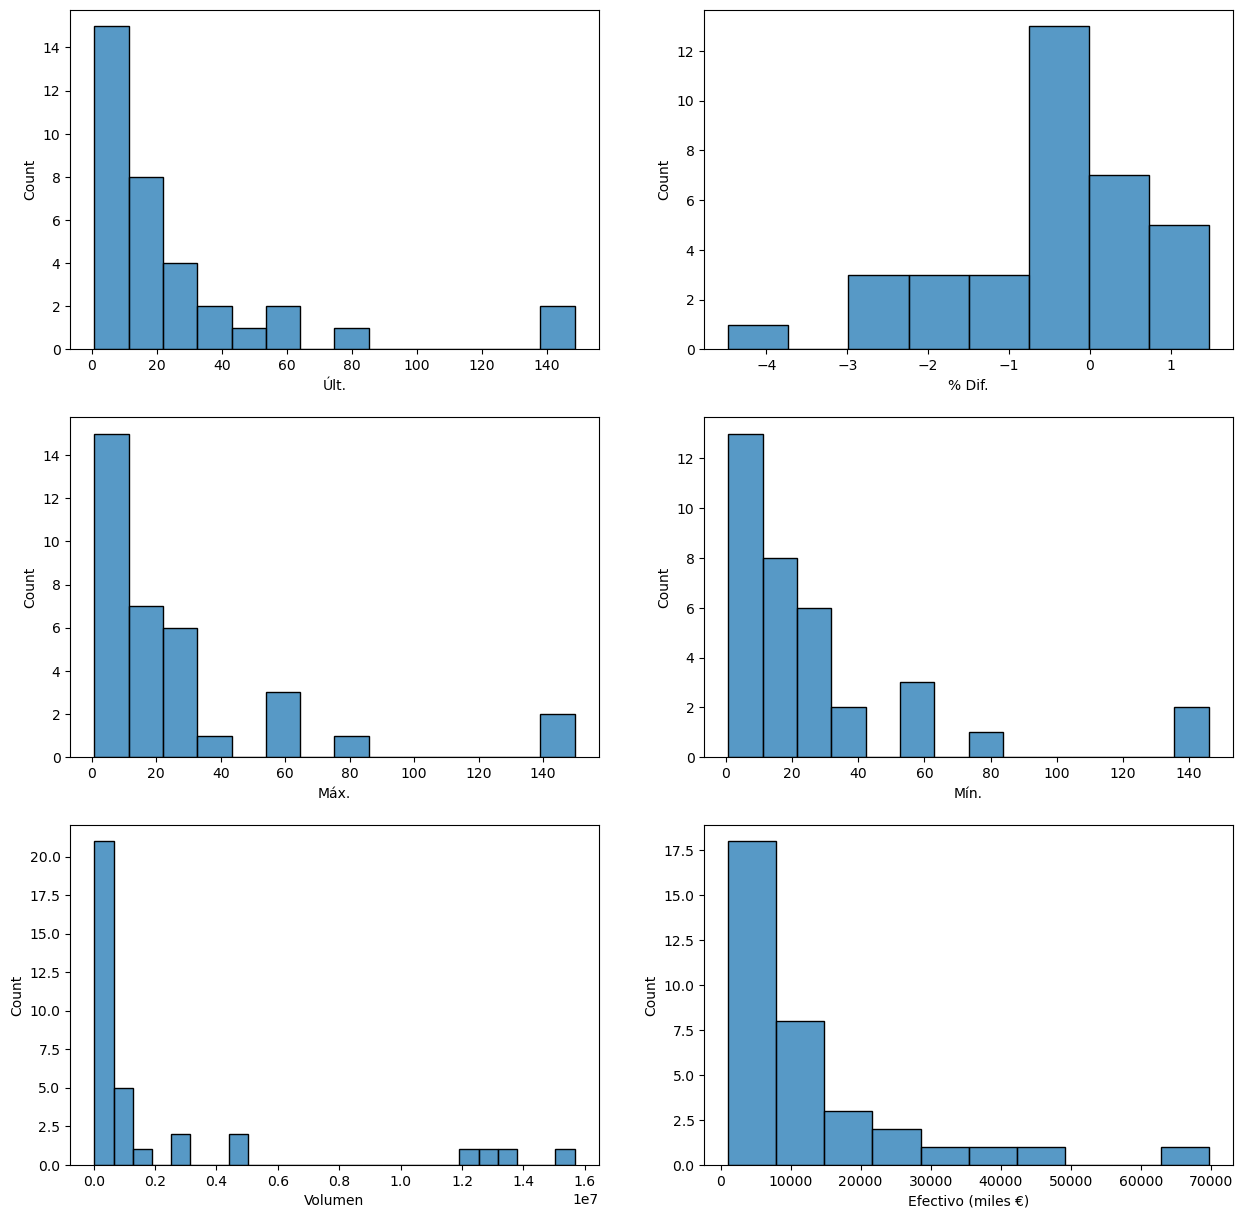

In [53]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

count=0
for i in range(0, 3):
    sns.histplot(x=ibex[nums[i+count]], ax=ax[i, 0])
    count+=1
    sns.histplot(x=ibex[nums[i+count]], ax=ax[i, 1])
    

plt.show()

In [55]:
#fig.savefig('dist.png')
#figure.savefig('rel.png')
ibex.to_csv('ibex_35_tecno_teleco.csv')

- Exercici 2

Documenta en un word el teu conjunt de dades generat amb la informació que tenen els diferents arxius de Kaggle.

Véase el documento "S16_T02_documentacion".

- Exercici 3

Tria una página web que tu vulguis i realitza web scraping mitjançant la llibreria Scrapy. 